In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
import numpy as np
from collections import defaultdict

In [12]:
filenames = [os.path.normpath(i) for i in glob.glob("D:/RNG_MEALPY/randomness_test/dieharder_test/*.txt")]
filenames

['D:\\RNG_MEALPY\\randomness_test\\dieharder_test\\beam_splitter_diehard.txt',
 'D:\\RNG_MEALPY\\randomness_test\\dieharder_test\\ibm_com_diehard.txt',
 'D:\\RNG_MEALPY\\randomness_test\\dieharder_test\\MT19937_diehard.txt',
 'D:\\RNG_MEALPY\\randomness_test\\dieharder_test\\quasirandom_diehard.txt']

In [13]:
order = 2
name = filenames[order][45:-4]
test = open(filenames[order], "r").read().splitlines()[8:]
del(test[-2])
del(test[-4])
del(test[-6])
len(test)

114

In [16]:
scatterValue = defaultdict(list)
passCase = 0
doubtCase = 0
failCase = 0

for subTest in test:
    testName = subTest[:20]
    pVal = float(subTest[47:56])
    if pVal <= 0.1 or pVal >= 0.9:
        failCase += 1
    elif pVal <= 0.25 or pVal >= 0.75:
        doubtCase += 1
    else:
        passCase +=1
    scatterValue[testName].append(pVal)

print(f"pass:  {passCase}\ndoubt: {doubtCase}\nfail:  {failCase}")

pass:  52
doubt: 27
fail:  35


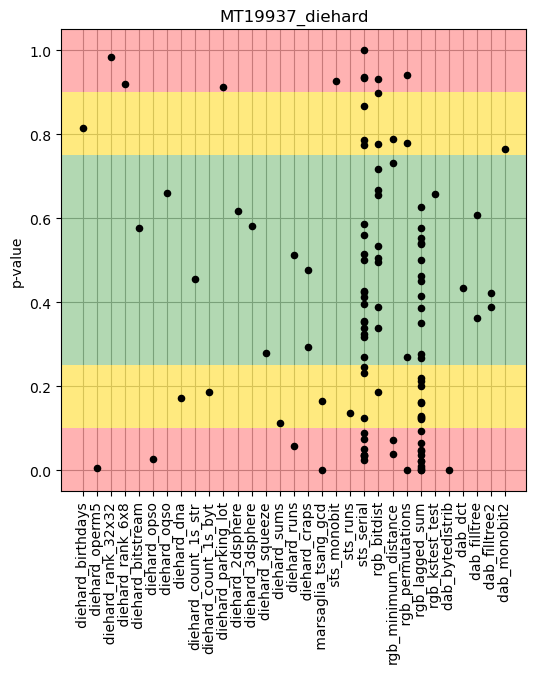

In [15]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)

# for diehard
ax.fill_between([-1.5,31.5], -0.1, 0.1, color='red', alpha=0.3, lw = 0)
ax.fill_between([-1.5,31.5], 1.1, 0.9, color='red', alpha=0.3, lw = 0)
ax.fill_between([-1.5,31.5], 0.1, 0.25, color='gold', alpha=0.5, lw = 0)
ax.fill_between([-1.5,31.5], 0.9, 0.75, color='gold', alpha=0.5, lw = 0)
ax.fill_between([-1.5,31.5], 0.25, 0.75, color='green', alpha=0.3, lw = 0)
plt.title(f"{name}")
plt.ylabel("p-value")
plt.xticks(rotation=90)

for (x, ys) in scatterValue.items():
    im = ax.scatter(
        [x] * len(ys),
        ys, 
        c="black", #
        linewidth=0, 
        s=30)

# # fig.colorbar(im)
# plt.yscale('log')

ax.set_axisbelow(True)
ax.yaxis.grid()
ax.xaxis.grid()

plt.show()